# A Card issuing Bank has over issued its cash and credit card in-order-to increase its market share, even to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash– card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders. From the perspective of risk control, estimating the probability of default will be more meaningful than classifying customers into the binary results – risky and non-risky.

#Description of the Data:
This research employed a binary variable – default payment, Y (Yes = 1, No = 0), as the response variable. 

This study used the following 23 variables as explanatory variables: 

#DATA DICTIONARY

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6–X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
X6 = the repayment status in September, 2005; 
X7 = the repayment status in August, 2005; 
X8 = the repayment status in July, 2005;
X9 = the repayment status in June, 2005;
X10 = the repayment status in May, 2005;
X11 = the repayment status in April, 2005. 
The measurement scale for the repayment status is: 
0 = pay duly; 
1 = payment delay for one month; 
2 = payment delay for two months; ...; 
8 = payment delay for eight months; 
9 = payment delay for nine months and above. 

X12–X17: Amount of bill statement (NT dollar). 
X12 = amount of bill statement in September,2005; 
X13 = amount of bill statement in August, 2005; 
X14 = amount of bill statement in July, 2005;
X15 = amount of bill statement in June, 2005;
X16 = amount of bill statement in May, 2005;
X17 = amount of bill statement in April, 2005. 

X18–X23: Amount of previous payment (NT dollar). 
X18 = amount paid in September,2005; 
X19 = amount paid in August,2005; 
X20 = amount paid in July,2005; 
X21 = amount paid in June,2005; 
X22 = amount paid in May,2005; 
X23 = amount paid in April, 2005. 

#SQL / Dashboard Analytics tasks:
•	Analyze the trend on outstanding amount for the bank 
o	Overall outstanding amount trends
o	Number of customers with outstanding amount (in different outstanding amount buckets)
o	Age of outstanding amount analysis
•	Is there any relationship between in outstanding amount / trend with respect to age, education, marriage, credit limit
•	Does outstanding amount / trend affect the default behavior in next month.

Modeling tasks:
•	Develop a predictive model (more than 90% accurate) to predict chance of default (credit score of customer) in next month based on available information.
•	Develop dashboard to present model statistics


In [3]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Reading the data from excel data file
data_credit_df=pd.read_excel('C:\\Users\Payal\Downloads\default_of_credit_card_clients_0.xlsx')
data_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [89]:
#SQL / Dashboard Analytics tasks: • Analyze the trend on outstanding amount for the bank o Overall outstanding amount trends

#Creating 'Calculated columns of Outstanding Amount for each month by subtracting Bill Amount with the Pay Amount of the respective month'.

data_credit_df['OUTSTANDING_AMT1_SEP2005']=data_credit_df['BILL_AMT1']-data_credit_df['PAY_AMT1']
data_credit_df['OUTSTANDING_AMT2_AUG2005']=data_credit_df['BILL_AMT2']-data_credit_df['PAY_AMT2']
data_credit_df['OUTSTANDING_AMT3_JUL2005']=data_credit_df['BILL_AMT3']-data_credit_df['PAY_AMT3']
data_credit_df['OUTSTANDING_AMT4_JUN2005']=data_credit_df['BILL_AMT4']-data_credit_df['PAY_AMT4']
data_credit_df['OUTSTANDING_AMT5_MAY2005']=data_credit_df['BILL_AMT5']-data_credit_df['PAY_AMT5']
data_credit_df['OUTSTANDING_AMT6_APR2005']=data_credit_df['BILL_AMT6']-data_credit_df['PAY_AMT6']

data_credit_df['OUTSTANDING_AMT_CUMULATIVE']= data_credit_df['OUTSTANDING_AMT1_SEP2005']+data_credit_df['OUTSTANDING_AMT2_AUG2005']+data_credit_df['OUTSTANDING_AMT3_JUL2005']+data_credit_df['OUTSTANDING_AMT4_JUN2005']+data_credit_df['OUTSTANDING_AMT5_MAY2005']+data_credit_df['OUTSTANDING_AMT6_APR2005']



In [90]:
data_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# Analyze the trend on outstanding amount for the bank

In [91]:
# Analyze the trend on outstanding amount for the bank
SEP2005=data_credit_df['OUTSTANDING_AMT1_SEP2005'].sum()
AUG2005=data_credit_df['OUTSTANDING_AMT2_AUG2005'].sum()
JUL2005=data_credit_df['OUTSTANDING_AMT3_JUL2005'].sum()
JUN2005=data_credit_df['OUTSTANDING_AMT4_JUN2005'].sum()
MAY2005=data_credit_df['OUTSTANDING_AMT5_MAY2005'].sum()
APR2005=data_credit_df['OUTSTANDING_AMT6_APR2005'].sum()
CUMULATIVE=data_credit_df['OUTSTANDING_AMT_CUMULATIVE'].sum()

In [92]:
print(SEP2005,AUG2005,JUL2005,JUN2005,MAY2005,APR2005,CUMULATIVE)

1366792512 1297737350 1253624199 1153106163 1065360400 1009687735 7146308359


In [93]:
OUTSTANDING_AMT_TREND={'PERIOD':('APR2005','MAY2005','JUN2005','JUL2005','AUG2005','SEP2005'), 'OUTSTANDING_AMT':(APR2005,MAY2005,JUN2005,JUL2005,AUG2005,SEP2005)}
OUTSTANDING_AMT_TREND_DF=pd.DataFrame(OUTSTANDING_AMT_TREND)
print(OUTSTANDING_AMT_TREND_DF)

    PERIOD  OUTSTANDING_AMT
0  APR2005       1009687735
1  MAY2005       1065360400
2  JUN2005       1153106163
3  JUL2005       1253624199
4  AUG2005       1297737350
5  SEP2005       1366792512


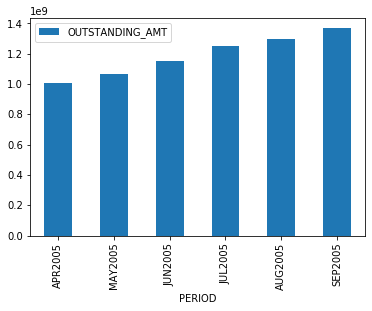

In [94]:
OUTSTANDING_AMT_TREND_DF.plot(kind='bar', x='PERIOD', y='OUTSTANDING_AMT')

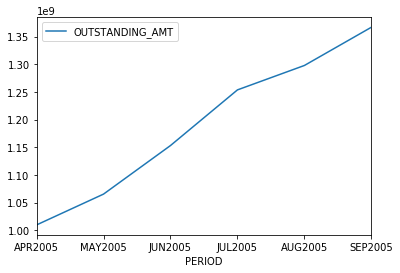

In [95]:
OUTSTANDING_AMT_TREND_DF.plot(kind='line', x='PERIOD', y='OUTSTANDING_AMT', )

In [96]:
# The above bar and line graph of 'Period' versus 'Outstanding_Amt' show that there has been an increasing trend (35% increase) in the Outstanding_Amt
#from Apr2005 to Sep2005. 

# Overall outstanding amount trends

In [97]:
# Also checking for the difference between the 'LIMIT_BAL' and the calculated column 'OUTSTANDING_AMT_CUMULATIVE'
# A negative difference could be an increased indication of defaulting

data_credit_df['DEFAULT_INDICATOR_1']=data_credit_df['LIMIT_BAL']-data_credit_df['OUTSTANDING_AMT_CUMULATIVE']


In [98]:
data_credit_df['DEFAULT_INDICATOR_1_FILTERED']=(data_credit_df['DEFAULT_INDICATOR_1']<0)

In [99]:
data_credit_df['DEFAULT_INDICATOR_1_FILTERED']

0        False
1        False
2         True
3         True
4         True
         ...  
29995     True
29996    False
29997     True
29998     True
29999     True
Name: DEFAULT_INDICATOR_1_FILTERED, Length: 30000, dtype: bool

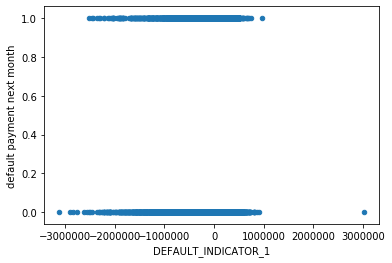

In [100]:
data_credit_df.plot.scatter(x='DEFAULT_INDICATOR_1', y='default payment next month')

In [101]:
# In the above graph the negative values of 'Default Indicator_1'coinsides with the value of 1 in the 'response variable'which is 'default payment next month'.
#the next step is to create a scatter plot and pivot table to ascertain when the default values matches between the response variable
# and the calculated default variable.

In [102]:
data_credit_df['DEFAULT_INDICATOR_1_FILTERED_CODED']=data_credit_df['DEFAULT_INDICATOR_1_FILTERED'].replace([True,False], [1,0])

In [103]:
print(data_credit_df['DEFAULT_INDICATOR_1_FILTERED_CODED'])

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT_INDICATOR_1_FILTERED_CODED, Length: 30000, dtype: int64


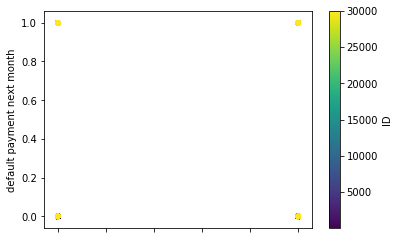

In [104]:
data_credit_df.plot.scatter(x='DEFAULT_INDICATOR_1_FILTERED_CODED', y='default payment next month', c='ID',colormap='viridis')

In [105]:
pd.pivot_table(data_credit_df, values=['ID'],index=['DEFAULT_INDICATOR_1_FILTERED_CODED'], columns=['default payment next month'],aggfunc=np.count_nonzero)

ID      
default payment next month              0     1
DEFAULT_INDICATOR_1_FILTERED_CODED             
0                                   11315  2449
1                                   12049  4187

In [106]:
# The above pivot table shows the distribution of 30,000 records between the 4 groups. 
# 11315 and 4187 (15502) are the number of records where the response variable and the calculated variable match for 
# non-defaulters and defaulters respectively.
# 12049 and 2249 (14498) are the number of records where the two variable do not match
# Thus, there is approximately 50% accuracy of determining the defaulters by this method

# Number of customers with outstanding amount (in different outstanding amount buckets) 

In [107]:
PAY_0_COUNT=pd.value_counts(data_credit_df.PAY_0)

In [108]:
PAY_0_COUNT=pd.value_counts(data_credit_df.PAY_0)
PAY_2_COUNT=pd.value_counts(data_credit_df.PAY_2)
PAY_3_COUNT=pd.value_counts(data_credit_df.PAY_3)
PAY_4_COUNT=pd.value_counts(data_credit_df.PAY_4)
PAY_5_COUNT=pd.value_counts(data_credit_df.PAY_5)
PAY_6_COUNT=pd.value_counts(data_credit_df.PAY_6)

In [109]:
print(PAY_0_COUNT,PAY_2_COUNT,PAY_3_COUNT,PAY_4_COUNT,PAY_5_COUNT,PAY_6_COUNT)

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_0, dtype: int64 0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64 0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64 0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
8        2
1        2
Name: PAY_4, dtype: int64 0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64 0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64


In [110]:
# The above 'value_counts' output of the respective 6 PAY_STATUS gives the count of customers in the respective
# outstanding amounts buckets for each of the month

# ? But the codes are not in a specific order for each of the outstanding payment, so using another method(groupby)

In [111]:
# Using the df.groupby method for getting the above outstanding amount bucket

In [112]:
P0=data_credit_df.groupby('PAY_0').agg(np.count_nonzero).iloc[:,1]
P2=data_credit_df.groupby('PAY_2').agg(np.count_nonzero).iloc[:,1]
P3=data_credit_df.groupby('PAY_3').agg(np.count_nonzero).iloc[:,1]
P4=data_credit_df.groupby('PAY_4').agg(np.count_nonzero).iloc[:,1]
P5=data_credit_df.groupby('PAY_5').agg(np.count_nonzero).iloc[:,1]
P6=data_credit_df.groupby('PAY_6').agg(np.count_nonzero).iloc[:,1]
print(P0,P2,P3,P4,P5,P6)

PAY_0
0    23182
1     3688
2     2667
3      322
4       76
5       26
6       11
7        9
8       19
Name: LIMIT_BAL, dtype: int64 PAY_2
0    25562
1       28
2     3927
3      326
4       99
5       25
6       12
7       20
8        1
Name: LIMIT_BAL, dtype: int64 PAY_3
0    25787
1        4
2     3819
3      240
4       76
5       21
6       23
7       27
8        3
Name: LIMIT_BAL, dtype: int64 PAY_4
0    26490
1        2
2     3159
3      180
4       69
5       35
6        5
7       58
8        2
Name: LIMIT_BAL, dtype: int64 PAY_5
0    27032
2     2626
3      178
4       84
5       17
6        4
7       58
8        1
Name: LIMIT_BAL, dtype: int64 PAY_6
0    26921
2     2766
3      184
4       49
5       13
6       19
7       46
8        2
Name: LIMIT_BAL, dtype: int64


In [113]:
P_STATUS_DF=pd.DataFrame({'PAY0':P0,'PAY2':P2,'PAY3':P3,'PAY4':P4,'PAY5':P5,'PAY6':P6})

In [114]:
# Number of customers with outstanding amount (in different outstanding amount buckets)
# ? What kind of visualization be apt for this dataset?
print(P_STATUS_DF)

    PAY0   PAY2   PAY3   PAY4     PAY5     PAY6
0  23182  25562  25787  26490  27032.0  26921.0
1   3688     28      4      2      NaN      NaN
2   2667   3927   3819   3159   2626.0   2766.0
3    322    326    240    180    178.0    184.0
4     76     99     76     69     84.0     49.0
5     26     25     21     35     17.0     13.0
6     11     12     23      5      4.0     19.0
7      9     20     27     58     58.0     46.0
8     19      1      3      2      1.0      2.0


# Age of outstanding amount analysis 

In [1]:
import seaborn as sns

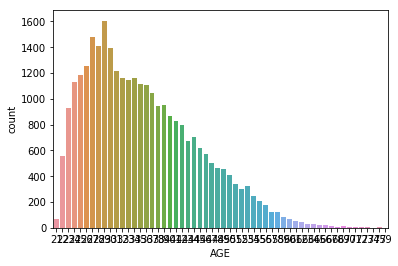

In [5]:
sns.countplot(data_credit_df['AGE'])

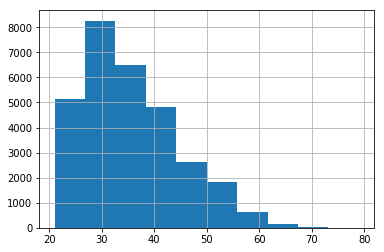

In [7]:
data_credit_df['AGE'].hist()

C:\Users\Payal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


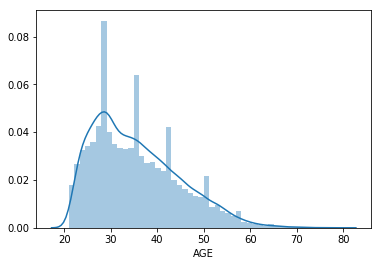

In [9]:
sns.distplot(data_credit_df['AGE'])

In [10]:
data_credit_df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

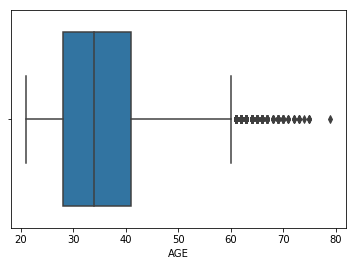

In [11]:
sns.boxplot(data_credit_df['AGE'])

In [13]:
from scipy.stats import skew
skew(data_credit_df['AGE'])

0.7322092559811012

In [14]:
from scipy.stats import kurtosis
kurtosis(data_credit_df['AGE'])

0.044096001350454994

In [15]:
# Since most of the age data lies between 28 to 34 years (because of positive skewness), the model to predict defaulter probability
# will be more accurate to this age group as compared to other age groups.

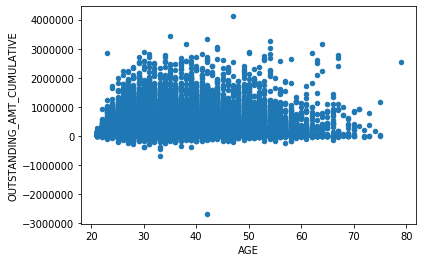

In [115]:
data_credit_df.plot.scatter(x='AGE', y='OUTSTANDING_AMT_CUMULATIVE')

In [116]:
data_credit_df['AGE'].corr(data_credit_df['OUTSTANDING_AMT_CUMULATIVE'])

0.05063377067369789

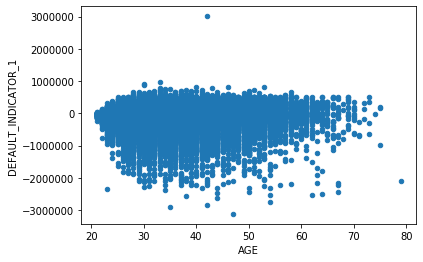

In [117]:
data_credit_df.plot.scatter(x='AGE', y='DEFAULT_INDICATOR_1')

In [118]:
data_credit_df['AGE'].corr(data_credit_df['DEFAULT_INDICATOR_1'])

0.0010986913448737031

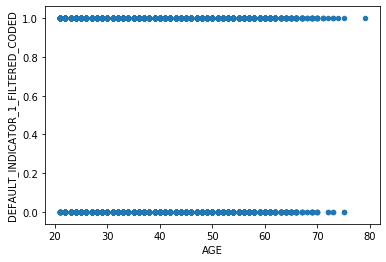

In [119]:
data_credit_df.plot.scatter(x='AGE', y='DEFAULT_INDICATOR_1_FILTERED_CODED')

In [120]:
data_credit_df['AGE'].corr(data_credit_df['DEFAULT_INDICATOR_1_FILTERED_CODED'])

-0.04249452425059881

In [121]:
# The above scatter plots and Pearson's coefficient values tells that 'age' has not trending relationship with 'outstanding amount' and defaulting properties.

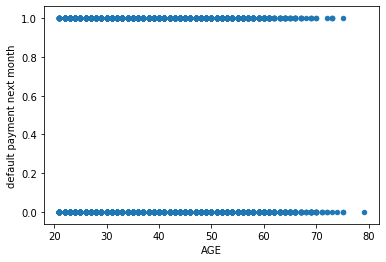

In [122]:
data_credit_df.plot.scatter(x='AGE', y='default payment next month')

In [123]:
data_credit_df['AGE'].corr(data_credit_df['default payment next month'])

0.013889834301963224

In [124]:
# The above conclusion about no dependence of age on outstanding amount and defaulting, is further reinstated
# by the above scatter plot and correlation coefficient value between 'age' and the response variable 'default payment next month'.

# Is there any relationship between in outstanding amount / trend with respect to age, education, marriage, credit limit 
# Does outstanding amount / trend affect the default behavior in next month.

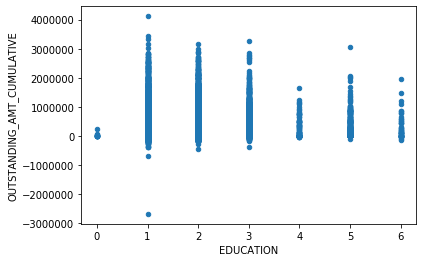

In [125]:
data_credit_df.plot.scatter(x='EDUCATION', y='OUTSTANDING_AMT_CUMULATIVE')

In [126]:
data_credit_df['EDUCATION'].corr(data_credit_df['OUTSTANDING_AMT_CUMULATIVE'])

0.01881803456387278

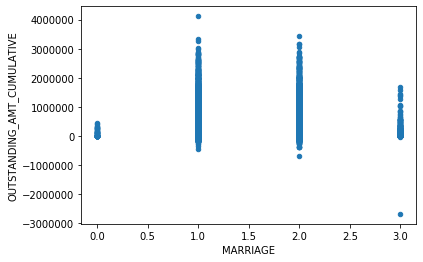

In [128]:
data_credit_df.plot.scatter(x='MARRIAGE', y='OUTSTANDING_AMT_CUMULATIVE')

In [129]:
data_credit_df['MARRIAGE'].corr(data_credit_df['OUTSTANDING_AMT_CUMULATIVE'])

-0.023733677732303914

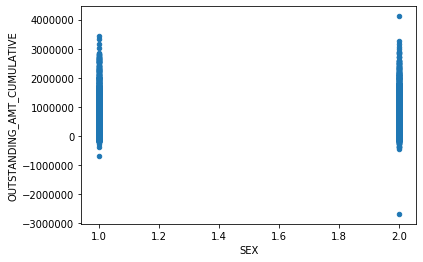

In [130]:
data_credit_df.plot.scatter(x='SEX', y='OUTSTANDING_AMT_CUMULATIVE')

In [131]:
data_credit_df['SEX'].corr(data_credit_df['OUTSTANDING_AMT_CUMULATIVE'])

-0.026272161996610557

In [132]:
# The above scatter plots and correlation coefficient suggest no dependency on outstanding amount and age, education, gender, marial status

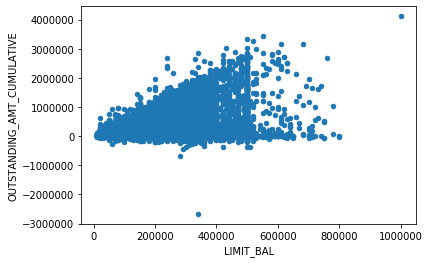

In [133]:
data_credit_df.plot.scatter(x='LIMIT_BAL', y='OUTSTANDING_AMT_CUMULATIVE')

In [134]:
data_credit_df['LIMIT_BAL'].corr(data_credit_df['OUTSTANDING_AMT_CUMULATIVE'])

0.25661573580830166

In [135]:
# There is slight positive correlation between Outstanding Amount and Credit Limit as seen by the scatter plot and coefficient of 0.256

In [136]:
data_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
ID                                    30000 non-null int64
LIMIT_BAL                             30000 non-null int64
SEX                                   30000 non-null int64
EDUCATION                             30000 non-null int64
MARRIAGE                              30000 non-null int64
AGE                                   30000 non-null int64
PAY_0                                 30000 non-null int64
PAY_2                                 30000 non-null int64
PAY_3                                 30000 non-null int64
PAY_4                                 30000 non-null int64
PAY_5                                 30000 non-null int64
PAY_6                                 30000 non-null int64
BILL_AMT1                             30000 non-null int64
BILL_AMT2                             30000 non-null int64
BILL_AMT3                             30000 non-null int64
BILL_A

In [137]:
# Creating a calculated column of Pay_status, which is a cumulative of all the 6 codes of pay status each month
data_credit_df['PAY_STATUS']=data_credit_df['PAY_0']+data_credit_df['PAY_2']+data_credit_df['PAY_3']+data_credit_df['PAY_4']+data_credit_df['PAY_5']+data_credit_df['PAY_6']

In [138]:
print(data_credit_df['PAY_STATUS'])

0        4
1        4
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    9
29998    1
29999    0
Name: PAY_STATUS, Length: 30000, dtype: int64


In [139]:
# Creating a dataframe where Pay_Status is greater than 0. So these are all the defaulter with delayed bill payment by different months.
defaulters_df=data_credit_df[data_credit_df['PAY_STATUS']>0]

In [140]:
defaulters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10069 entries, 0 to 29998
Data columns (total 36 columns):
ID                                    10069 non-null int64
LIMIT_BAL                             10069 non-null int64
SEX                                   10069 non-null int64
EDUCATION                             10069 non-null int64
MARRIAGE                              10069 non-null int64
AGE                                   10069 non-null int64
PAY_0                                 10069 non-null int64
PAY_2                                 10069 non-null int64
PAY_3                                 10069 non-null int64
PAY_4                                 10069 non-null int64
PAY_5                                 10069 non-null int64
PAY_6                                 10069 non-null int64
BILL_AMT1                             10069 non-null int64
BILL_AMT2                             10069 non-null int64
BILL_AMT3                             10069 non-null int64
BILL_A

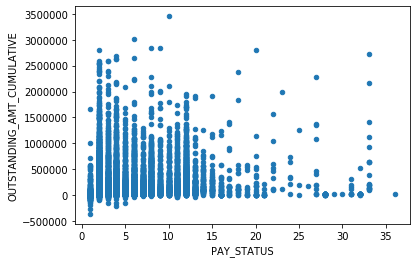

In [141]:
# Now, finding the relationship between Outstanding amount and Pay status
defaulters_df.plot.scatter(x='PAY_STATUS', y='OUTSTANDING_AMT_CUMULATIVE')

In [142]:
defaulters_df['PAY_STATUS'].corr(defaulters_df['OUTSTANDING_AMT_CUMULATIVE'])

0.15436882668385485

In [143]:
# The above scatter plot and r value (0.154) shows slight positive correlation of Outstanding amount and Pay Status

In [144]:
#  Does outstanding amount / trend affect the default behavior in next month.
# The below scatter plot and r value shows no relation between Outstanding Value and 'default payment next month'

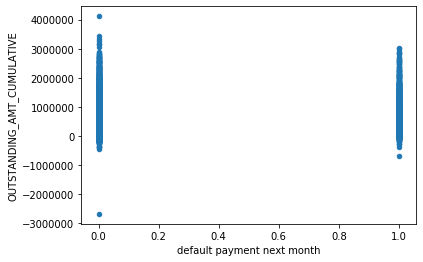

In [145]:
data_credit_df.plot.scatter(x='default payment next month', y='OUTSTANDING_AMT_CUMULATIVE')

In [146]:
data_credit_df['default payment next month'].corr(data_credit_df['OUTSTANDING_AMT_CUMULATIVE'])

0.0038792064525704426

In [147]:
# TO DO: MODELLING TASK
# Develop a predictive model (more than 90% accurate) to predict chance of default (credit score of customer) in next month based on available information. • Develop dashboard to present model statistics
